In [1]:
from sklearn.datasets import load_iris

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3]:
iris = load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [8]:
df.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2

In [9]:
df.sample(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
134                6.1               2.6                5.6               1.4
87                 6.3               2.3                4.4               1.3
45                 4.8               3.0                1.4               0.3

In [11]:
iris.target
## we can see 3 categories here through 0,1,2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
X = iris.data
y = iris.target

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=10)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [15]:
gnb = GaussianNB()

In [16]:
gnb.fit(x_train,y_train)

GaussianNB()

In [17]:
y_pred = gnb.predict(x_test)

In [18]:
accuracy_score(y_test,y_pred)

1.0

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


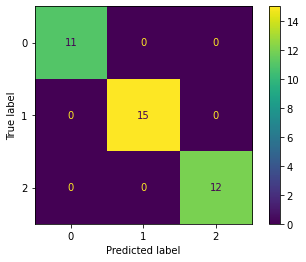

In [22]:
plot_confusion_matrix(gnb,x_test,y_pred)

In [25]:
precision_score(y_test,y_pred, average='macro')

1.0

In [26]:
precision_score(y_test,y_pred, average='weighted')

1.0

In [27]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [31]:
roc_auc_score(y_test,gnb.predict_proba(x_test),multi_class='ovo')
## ovo is 'one versus one'

1.0